## Model Representation

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import math, copy

In [42]:
x_train = np.array([1, 1.5, 1.75, 2, 2.3, 2.8, 3]) # area in x1000 sq. ft.
y_train = np.array([200, 230, 300, 320, 350, 400, 440 ])

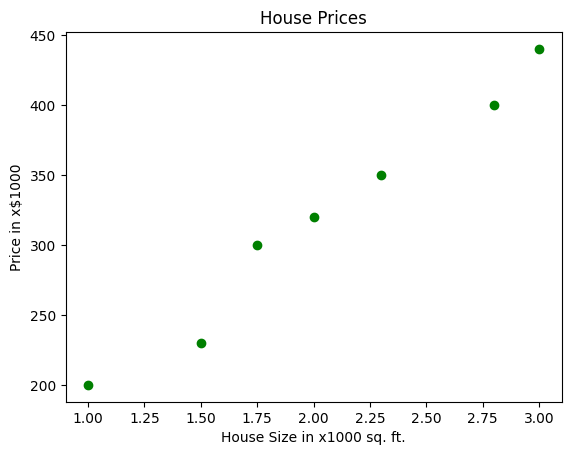

In [43]:
plt.scatter(x_train,y_train,c='green',marker='o')

plt.xlabel('House Size in x1000 sq. ft.')
plt.ylabel('Price in x$1000')
plt.title('House Prices')
plt.show()

In [44]:
m = x_train.shape
m

(7,)

In [45]:
f_wb = np.zeros(m[0])
f_wb

array([0., 0., 0., 0., 0., 0., 0.])

In [46]:
def compute_model(x, w, b):

    m=x.shape[0]
    f_wb = np.zeros(m)

    for i in range(0,m):
        f_wb[i] = w*x[i]+b

    return f_wb

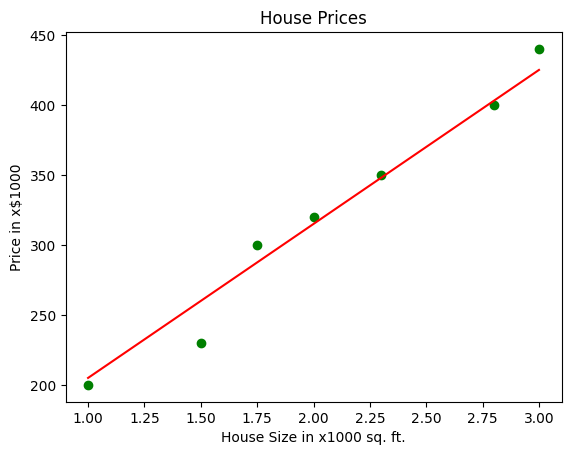

In [47]:
# let w = 100, b = 100
w, b = 110, 95
y_predicted = compute_model(x_train, w, b)
y_predicted

# plotting training values and predicted values together in the same plot:
plt.scatter(x_train,y_train, c='green',marker='o', label= 'Predicted Values')
plt.plot(x_train, y_predicted, c= 'red', label= 'Actual Values')
plt.xlabel('House Size in x1000 sq. ft.')
plt.ylabel('Price in x$1000')
plt.title('House Prices')
plt.show()

## Cost Function

In [48]:
def compute_cost(x,y,w,b):

    cost_sum = 0
    m=x.shape[0]

    for i in range(0,m):
        f_wb[i] = w*x[i] + b
        cost = (f_wb[i]-y[i])**2
        cost_sum += cost
    
    total_cost = (1/(2*m))*cost_sum
    return total_cost


In [49]:
j_wb=compute_cost(x_train,y_train,w,b)
j_wb

96.01785714285714

## Gradient Descent

In lecture, *gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  

The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$    

In [50]:
# calculating partial derivates
def compute_gradient(x, y, w, b): 

    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [51]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [52]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 4.85e+04  dj_dw: -7.079e+02, dj_db: -3.200e+02   w:  7.079e+00, b: 3.20000e+00
Iteration 1000: Cost 7.70e+01  dj_dw:  2.675e-01, dj_db: -5.946e-01   w:  1.234e+02, b: 6.63596e+01
Iteration 2000: Cost 7.49e+01  dj_dw:  1.229e-01, dj_db: -2.731e-01   w:  1.216e+02, b: 7.04905e+01
Iteration 3000: Cost 7.44e+01  dj_dw:  5.644e-02, dj_db: -1.255e-01   w:  1.207e+02, b: 7.23880e+01
Iteration 4000: Cost 7.43e+01  dj_dw:  2.593e-02, dj_db: -5.763e-02   w:  1.203e+02, b: 7.32595e+01
Iteration 5000: Cost 7.43e+01  dj_dw:  1.191e-02, dj_db: -2.647e-02   w:  1.202e+02, b: 7.36599e+01
Iteration 6000: Cost 7.43e+01  dj_dw:  5.470e-03, dj_db: -1.216e-02   w:  1.201e+02, b: 7.38438e+01
Iteration 7000: Cost 7.43e+01  dj_dw:  2.513e-03, dj_db: -5.585e-03   w:  1.200e+02, b: 7.39282e+01
Iteration 8000: Cost 7.43e+01  dj_dw:  1.154e-03, dj_db: -2.565e-03   w:  1.200e+02, b: 7.39670e+01
Iteration 9000: Cost 7.43e+01  dj_dw:  5.301e-04, dj_db: -1.178e-03   w:  1.200e+02, b: 7.39849e+01


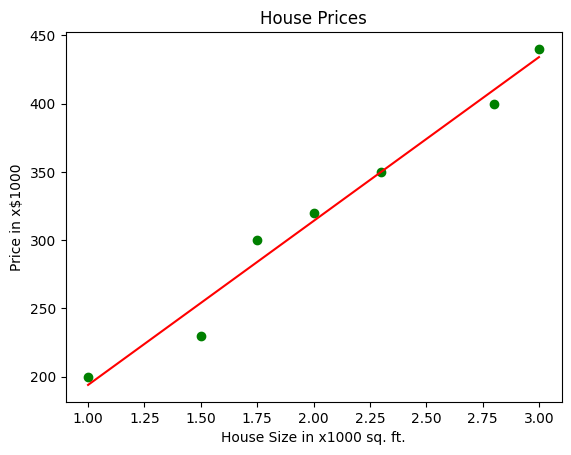

In [53]:
y_predicted = compute_model(x_train, w_final, b_final)
y_predicted

# plotting training values and predicted values together in the same plot:
plt.scatter(x_train,y_train, c='green',marker='o', label= 'Predicted Values')
plt.plot(x_train, y_predicted, c= 'red', label= 'Actual Values')
plt.xlabel('House Size in x1000 sq. ft.')
plt.ylabel('Price in x$1000')
plt.title('House Prices')
plt.show()